Raíz encontrada en 0.000000 después de 2 iteraciones.
Iteración 0: x=1.000000, f(x)=0.341471
Iteración 1: x=0.000000, f(x)=0.000000
Iteración 2: x=0.000000, f(x)=0.000000


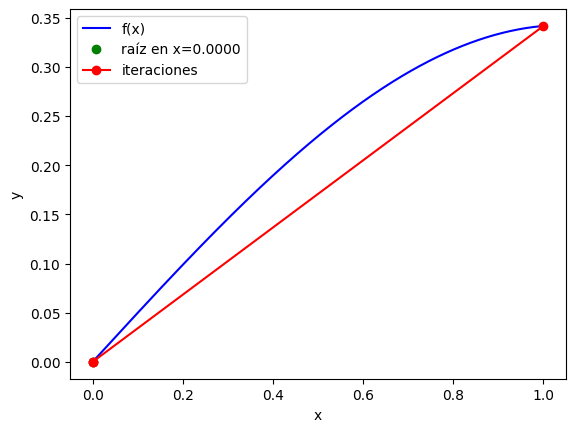

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def secant(f, x0, x1, tol=1e-6, max_iter=100):
    """Método de la secante para encontrar una raíz de la función f(x).

    Args:
        f (function): La función de la que se busca la raíz.
        x0 (float): Primer valor inicial.
        x1 (float): Segundo valor inicial.
        tol (float, optional): Tolerancia para la convergencia. Valor por defecto 1e-6.
        max_iter (int, optional): Número máximo de iteraciones. Valor por defecto 100.

    Returns:
        float: La aproximación de la raíz de la función f(x).
    """
    x = x1
    x_prev = x0
    iterations = [(x, f(x))]
    for i in range(max_iter):
        f0 = f(x_prev)
        f1 = f(x)
        x_next = x - f1 * (x - x_prev) / (f1 - f0)
        iterations.append((x_next, f(x_next)))
        if abs(x_next - x) < tol:
            print(f"Raíz encontrada en {x_next:.6f} después de {i+1} iteraciones.")
            return x_next, iterations
        x_prev = x
        x = x_next
    print("Método de la secante no convergió.")
    return None, iterations

# Definir la función
f = lambda x: np.sin(x) - x/2

# Definir los valores iniciales
x0 = 0
x1 = 1

# Aplicar el método de la secante
root, iterations = secant(f, x0, x1)

# Imprimir las iteraciones y las raíces encontradas
for i, (x, y) in enumerate(iterations):
    print(f"Iteración {i}: x={x:.6f}, f(x)={y:.6f}")
    
# Graficar la función y las iteraciones del método
x_vals = np.linspace(0, 1, 1000)
fig, ax = plt.subplots()
ax.plot(x_vals, f(x_vals), 'b-', label='f(x)')
ax.plot(root, f(root), 'go', label=f'raíz en x={root:.4f}')
ax.plot([x for x, y in iterations], [y for x, y in iterations], 'ro-', label='iteraciones')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

Raíz encontrada en 1.895495 después de 12 iteraciones.
Iteración 0: x=1.000000, f(x)=0.341471
Iteración 1: x=-7.472741, f(x)=2.808167
Iteración 2: x=14.478521, f(x)=-6.296958
Iteración 3: x=6.935115, f(x)=-2.860836
Iteración 4: x=16.635684, f(x)=-9.118097
Iteración 5: x=8.343938, f(x)=-3.289615
Iteración 6: x=4.954633, f(x)=-3.448119
Iteración 7: x=-8.301318, f(x)=3.249057
Iteración 8: x=-4.817320, f(x)=3.403160
Iteración 9: x=3.792574, f(x)=-2.502255
Iteración 10: x=1.861061, f(x)=0.027638
Iteración 11: x=1.896214, f(x)=-0.000590
Iteración 12: x=1.895495, f(x)=-0.000000


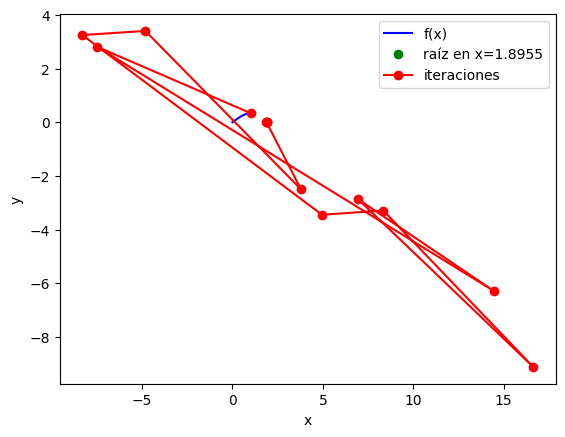

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def newton(f, df, x0, tol=1e-6, max_iter=100):
    """Método de Newton para encontrar una raíz de la función f(x).

    Args:
        f (function): La función de la que se busca la raíz.
        df (function): La derivada de la función f(x).
        x0 (float): Valor inicial.
        tol (float, optional): Tolerancia para la convergencia. Valor por defecto 1e-6.
        max_iter (int, optional): Número máximo de iteraciones. Valor por defecto 100.

    Returns:
        float: La aproximación de la raíz de la función f(x).
    """
    x = x0
    iterations = [(x, f(x))]
    for i in range(max_iter):
        x = x - f(x) / df(x)
        iterations.append((x, f(x)))
        if abs(f(x)) < tol:
            print(f"Raíz encontrada en {x:.6f} después de {i+1} iteraciones.")
            return x, iterations
    print("Método de Newton no convergió.")
    return None, iterations

# Ejemplo de uso
f = lambda x: np.sin(x) - x/2
df = lambda x: np.cos(x) - 0.5
x0 = 1
root, iterations = newton(f, df, x0)

# Imprimir las iteraciones del método
for i, (x, y) in enumerate(iterations):
    print(f"Iteración {i}: x={x:.6f}, f(x)={y:.6f}")

# Graficar la función y las iteraciones del método
x_vals = np.linspace(0, 1, 1000)
fig, ax = plt.subplots()
ax.plot(x_vals, f(x_vals), 'b-', label='f(x)')
ax.plot(root, f(root), 'go', label=f'raíz en x={root:.4f}')
ax.plot([x for x, y in iterations], [y for x, y in iterations], 'ro-', label='iteraciones')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()